In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Admissions

In [3]:
admissions_df = pd.read_csv("../../../../mimic-iv-2.2/hosp/admissions.csv")
admissions_df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [5]:
subjectids = len(set(admissions_df["subject_id"]))
hadmids = len(set(admissions_df["hadm_id"]))
print(subjectids)
print(hadmids)
print(hadmids/subjectids)

180733
431231
2.3860114090951847


In [6]:
print(np.sum(np.array(admissions_df['hospital_expire_flag'])))

8609


### PATIENTS

In [7]:
patients_df = pd.read_csv("../../../../mimic-iv-2.2/hosp/patients.csv")
patients_df.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


In [8]:
print(np.average(np.array(patients_df['anchor_age'])))

48.53988829276105


In [12]:
print(patients_df.describe())

         subject_id     anchor_age    anchor_year
count  2.997120e+05  299712.000000  299712.000000
mean   1.500885e+07      48.539888    2151.124056
std    2.885019e+06      20.895650      23.464598
min    1.000003e+07      18.000000    2110.000000
25%    1.250796e+07      29.000000    2131.000000
50%    1.501416e+07      48.000000    2151.000000
75%    1.750489e+07      65.000000    2171.000000
max    1.999999e+07      91.000000    2208.000000


In [13]:
male_count = patients_df[patients_df['gender'] == 'M'].shape[0]
female_count = patients_df[patients_df['gender'] == 'F'].shape[0]

print("Number of males:", male_count)
print("Number of females:", female_count)

Number of males: 141159
Number of females: 158553


### ICU STAYS

In [5]:
icustays_df = pd.read_csv("../../../../../mimic-iv-2.2/icu/icustays.csv")
icustays_df.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588


In [6]:
print(icustays_df.describe())

         subject_id       hadm_id       stay_id           los
count  7.318100e+04  7.318100e+04  7.318100e+04  73181.000000
mean   1.499819e+07  2.498133e+07  3.499274e+07      3.451931
std    2.886067e+06  2.884400e+06  2.889261e+06      4.922840
min    1.000003e+07  2.000009e+07  3.000015e+07      0.001250
25%    1.249126e+07  2.248335e+07  3.248935e+07      1.084225
50%    1.499894e+07  2.496964e+07  3.499389e+07      1.926782
75%    1.751327e+07  2.747180e+07  3.748840e+07      3.713322
max    1.999999e+07  2.999983e+07  3.999981e+07    110.232280


In [7]:
subjectids = len(set(icustays_df["subject_id"]))
hadmids = len(set(icustays_df["hadm_id"]))
stayids = len(set(icustays_df["stay_id"]))
print(subjectids)
print(hadmids)
print(stayids)
print(hadmids/subjectids)
print(stayids/subjectids)
print(stayids/hadmids)

50920
66239
73181
1.3008444619010213
1.4371759622937943
1.1048023067981099


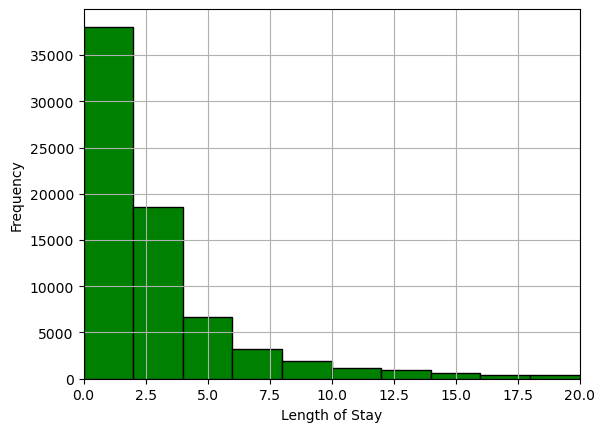

In [9]:
plt.xlim(0,20)
plt.hist(icustays_df[icustays_df['los']<20]['los'], color='green', edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Length of Stay')
# plt.title('Histogram of Values')
plt.grid(True)
plt.show()